##  Here, I explore SVD and PCA with some code examples

In [392]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [355]:
# Parameters for 2D gaussian 
mean = [3, 3]
cov = [[4, 1], [1, 0.5]]

In [356]:
x, y = np.random.multivariate_normal(mean, cov, 10000).T

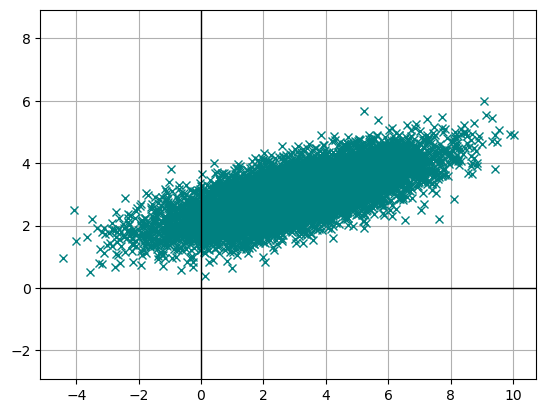

In [357]:
plt.plot(x, y, 'x', color='teal')
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)
plt.axis('equal')
plt.grid()

In [358]:
## Try to retrieve the covariance matrix with the data points
# Construct design matrix
X = np.stack([x, y])      # 2 x 10,000 matrix - 10,000 entries, x and y are rows

# Get the mean rows:
mean_row = np.mean(X, axis=1)                   # should be approx. (3, 3)
X_mean = np.tile(mean_row, (X.shape[1], 1)).T   # repeat mean row 10,000 times in axis 1 and transpose
X_centered = X - X_mean                         # center the (x,y) coordinates of X
print(X_centered, X_centered.shape)

[[-1.42122098 -2.31821861  0.88546801 ... -3.39395705  0.7791488
   0.27494387]
 [-0.40218103 -0.68006863  0.32313512 ... -1.25168929  0.28874125
   0.72626908]] (2, 10000)


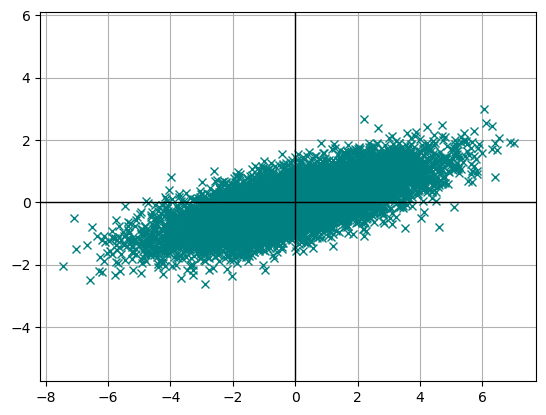

In [359]:
# Plot centered distribution
plt.plot(X_centered[0,:], X_centered[1,:], 'x', color='teal')
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)
plt.axis('equal')
plt.grid()

In [360]:
# Calculate covariance/correlation matrix of centered design matirx
C = X_centered/np.sqrt(10000) @ X_centered.T/np.sqrt(10000)
print(C)

[[4.03784537 1.01965068]
 [1.01965068 0.50927378]]


In [361]:
# Perform SVD on matrix X_centered
U, S, V_T = np.linalg.svd(X_centered/np.sqrt(X_centered.shape[1]), full_matrices=False)

In [362]:
# Calculate the principal components
T = U @ np.diag(S)
print(T.shape)
print(S)
print(T)

(2, 2)
[2.07636736 0.48561067]
[[-2.00549807 -0.12578893]
 [-0.53784655  0.46903611]]


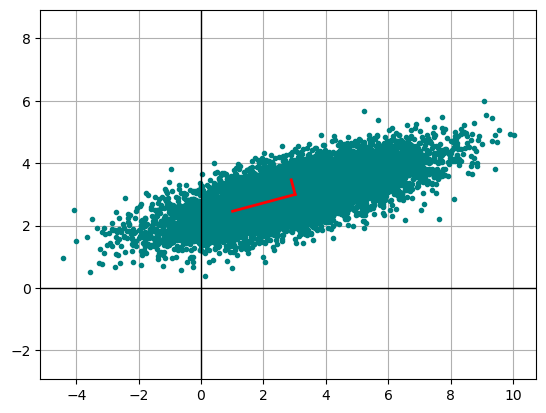

In [363]:
# Plot original data with principal components
plt.plot(X[0,:], X[1,:], '.', color='teal')
plt.plot([mean_row[0], mean_row[0]+T[0, 0]],
         [mean_row[1], mean_row[1]+T[1, 0]], '-', color='r', linewidth=2)
plt.plot([mean_row[0], mean_row[0]+T[0, 1]],
         [mean_row[1], mean_row[1]+T[1, 1]], '-', color='r', linewidth=2)
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)
plt.axis('equal')
plt.grid()

### Generate the 2D gaussian only with random gaussian (x,y) points and a rotation matirx

(2500, 2)


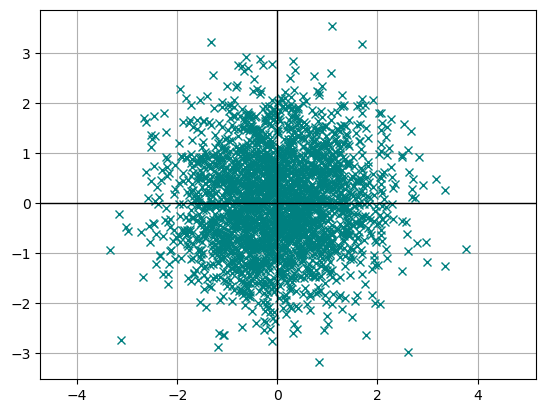

In [364]:
# Generate n points
n = 2500
points = np.random.randn(n, 2)
print(points.shape)

# Plot
# Plot 2D unit gaussian
plt.plot(points[:,0], points[:,1], 'x', color='teal')
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)
plt.axis('equal')
plt.grid()

In [365]:
def get_rotation_matrix(theta):
    """Generates a rotation matrix with angle theta.

    Args:
        theta (float): Rotation angle.

    Returns:
        np.ndarray: Rotation matrix that rotates a vector with angle theta.
    """
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])

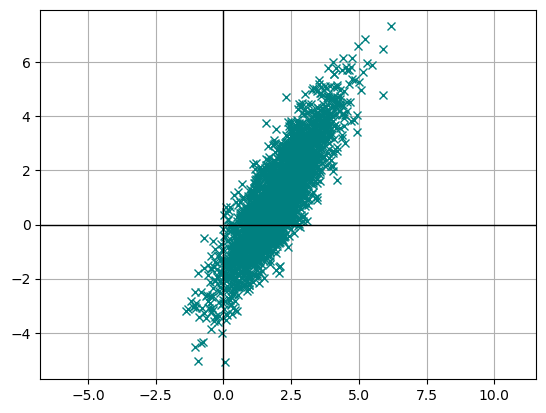

In [366]:
# Def the center and variance of the distribution
sigma = np.array([2., 0.5])     # variance in x and y direction
center = np.array([[2, 1]])       # center of distr.    
theta = np.pi/3.                # rotation angle
R = get_rotation_matrix(theta)

## Transform the uniform normally distributed point cloud
# Introduce x,y variance, offset and rotation
X = points @ np.diag(sigma) @ R.T + np.ones((n,1)) @ center

# Plot
# Plot variated distribution
plt.plot(X[:,0], X[:,1], 'x', color='teal')
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)
plt.axis('equal')
plt.grid()

In [367]:
# Get the mean rows
mean_row = np.mean(X, axis=0)
X_mean = np.tile(mean_row, (X.shape[0], 1))     # repeat mean row 10,000 times in axis 1
X_centered = (X - X_mean).T                         # center the (x,y) coordinates of X
print(mean_row)
print(X_centered.shape)

[1.98239924 0.98788849]
(2, 2500)


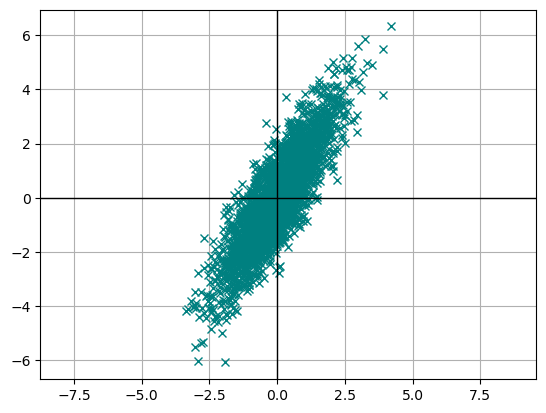

In [368]:
# Plot
# Plot centered distr.
plt.plot(X_centered[0,:], X_centered[1,:], 'x', color='teal')
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)
plt.axis('equal')
plt.grid()

In [369]:
# SVD on the centered and standardized design matrix
U, S, V_T = np.linalg.svd(X_centered/np.sqrt(n), full_matrices=False)

# Calculate principal components
T = U @ np.diag(S)

In [376]:
# Explore the result
print(U, U.shape)
print(np.diag(S), np.diag(S).shape)
print(V_T, V_T.shape)
print(T, T.shape)

[[-0.49216456 -0.87050218]
 [-0.87050218  0.49216456]] (2, 2)
[[2.00267619 0.        ]
 [0.         0.49033146]] (2, 2)
[[-0.01220621 -0.0060276   0.0073597  ... -0.0039486   0.01531844
  -0.00065612]
 [-0.02724687 -0.02636814 -0.00844411 ...  0.03882463 -0.01479845
  -0.03896817]] (2, 2500)
[[-0.98564624 -0.42683461]
 [-1.74333399  0.24132377]] (2, 2)


In [377]:
# Get 1, 2, 3 std
theta = 2 * np.pi * np.arange(0, 1, 0.01)

X_std = T @ np.array([np.cos(theta), np.sin(theta)])
print(X_std.shape)

(2, 100)


(-1.768417812122275, 6.55049627505915, -5.715936527533849, 7.934664190969881)

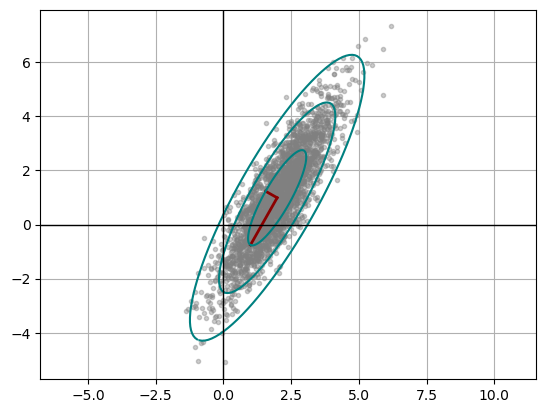

In [380]:
# Plot
# Plot centered distr.
plt.plot(X[:,0], X[:,1], '.', color='grey', alpha=0.4)

plt.plot([mean_row[0], mean_row[0]+T[0, 0]],
         [mean_row[1], mean_row[1]+T[1, 0]], '-', color='darkred', linewidth=2)
plt.plot([mean_row[0], mean_row[0]+T[0, 1]],
         [mean_row[1], mean_row[1]+T[1, 1]], '-', color='darkred', linewidth=2)
plt.plot(mean_row[0] + X_std[0,:], mean_row[1] + X_std[1,:], '-', color='teal')
plt.plot(mean_row[0] + 2*X_std[0,:], mean_row[1] + 2*X_std[1,:], '-', color='teal')
plt.plot(mean_row[0] + 3*X_std[0,:], mean_row[1] + 3*X_std[1,:], '-', color='teal')
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)
plt.grid()
plt.axis('equal')

(2, 200)


(-1.2298019514639553,
 1.2298019514639553,
 -1.2298019514639553,
 1.2298019514639553)

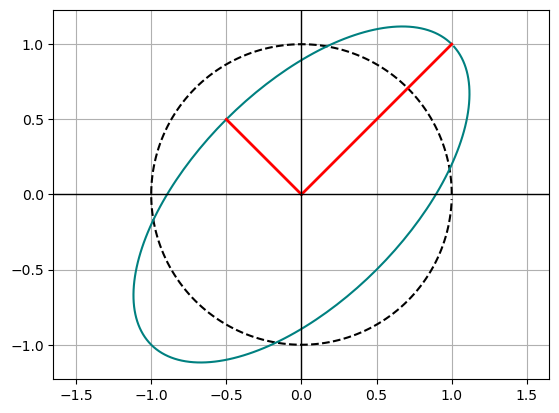

In [373]:
# Test some deformations
theta = 2 * np.pi * np.arange(0, 1, 0.005)
unit_circle = np.array([
    np.cos(theta),
    np.sin(theta)
])

# Def deformation matrix
A = np.array([
    [1, -0.5],
    [1, 0.5]
])

X_std = A @ unit_circle
print(X_std.shape)


# Plot centered distr.
plt.plot(unit_circle[0,:], unit_circle[1,:], '--', color='k')
plt.plot(X_std[0,:], X_std[1,:], '-', color='teal')
plt.plot([0, A[0, 0]],
         [0, A[1, 0]], '-', color='red', linewidth=2)
plt.plot([0, A[0, 1]],
         [0, A[1, 1]], '-', color='red', linewidth=2)
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)
plt.grid()
plt.axis('equal')

## Try SVD and PCA on toy example

In [400]:
# Read data
# data = pd.read_csv("../data/wdbc.data", header=None)
breast_cancer = datasets.load_breast_cancer()
data = breast_cancer.data
print(data.shape)       # 569 x 30 matrix - 569 samples and 30 features

(569, 30)


In [397]:
# TODO: Go on here.

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])